<a href="https://colab.research.google.com/github/vetka911/Portfilio/blob/main/%D0%91%D0%B5%D0%BB%D0%BE%D0%B2%D0%B0_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B5_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Step 1. Загрузка исходных данных (парсинг сайта https://smart-lab.ru используя power query)

In [ ]:
%%capture
import pandas as pd
import numpy as np
import glob, os

In [ ]:
files = glob.glob('/content/*.xlsx')
df = pd.concat([pd.read_excel(fp, sheet_name='Set').assign(industry=os.path.basename(fp.replace('.xlsx', ''))) for fp in files])
df.head()

,company,line_item,Year,Значение,industry
0,LENT,Дата отчета,2019,25.02.2020,Retail
1,LENT,Дата отчета,2020,24.02.2021,Retail
2,LENT,Дата отчета,2021,21.02.2022,Retail
3,LENT,Дата отчета,2022,29.03.2023,Retail
4,LENT,Дата отчета,2023,21.03.2024,Retail


In [ ]:
values = ['ROE, %', 'Чистая прибыль, млрд руб', 'Выручка, млрд руб', 'Активы, млрд руб', 'Долг, млрд руб', "ROA, %", "Чистые активы, млрд руб"]
df_filtered = df[df['line_item'].isin(values)]
years = ['2023', '2022', '2021', '2020', '2019']
#полный список компаний: companys = ['BELU', 'BISV', 'FIVE', 'FIXP', 'LENT', 'LVHK', 'MGNT', 'MGTS', 'MTSS', 'MVID', 'NSVZ', 'OKEY', 'OZON', 'RTKM', 'TTLK']
companys = ['BELU', 'FIVE', 'LENT', 'MGNT', 'MGTS', 'NSVZ', 'RTKM', 'TTLK']
df_filtered = df_filtered[df_filtered['company'].isin(companys)]
df_filtered = df_filtered[df_filtered['Year'].isin(years)]
df_filtered['Year'] = pd.to_datetime(df_filtered['Year']).dt.year
df_filtered['Значение'] = df_filtered['Значение'].str.rstrip('%').str.replace(r'[\s]','', regex=True).astype(float)
df_filtered.head()

,company,line_item,Year,Значение,industry
63,LENT,"Выручка, млрд руб",2019,417.5,Retail
64,LENT,"Выручка, млрд руб",2020,445.5,Retail
65,LENT,"Выручка, млрд руб",2021,483.6,Retail
66,LENT,"Выручка, млрд руб",2022,537.4,Retail
67,LENT,"Выручка, млрд руб",2023,615.9,Retail


В процессе анализа данных выяснили, что величина активов по Белуге ('BELU') указана неверно 42.4 вместо 96.2 (как в фин отчетности)

In [ ]:
df_filtered[df_filtered.Значение == 42.4]

,company,line_item,Year,Значение,industry
1913,BELU,"Активы, млрд руб",2023,42.4,Retail


In [ ]:
df_filtered['Значение'] = df_filtered['Значение'].replace(42.4,96.2)



---


# Step 2. Расчет и анализ показателей

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MaxNLocator
#import seaborn.objects as so





---




# ROE: Retail vs Telecom

In [ ]:
#roe retail
df_roe = df_filtered[(df_filtered.line_item == 'ROE, %')].assign(line_item2='roe')
df_roe['Значение'] = df_roe['Значение']/100
df_roe.head()

,company,line_item,Year,Значение,industry,line_item2
258,LENT,"ROE, %",2019,-0.026,Retail,roe
259,LENT,"ROE, %",2020,0.179,Retail,roe
260,LENT,"ROE, %",2021,0.123,Retail,roe
261,LENT,"ROE, %",2022,0.036,Retail,roe
262,LENT,"ROE, %",2023,-0.007,Retail,roe


Text(0.5, 0.98, 'Return on Equity (ROE) (avg by industry)')

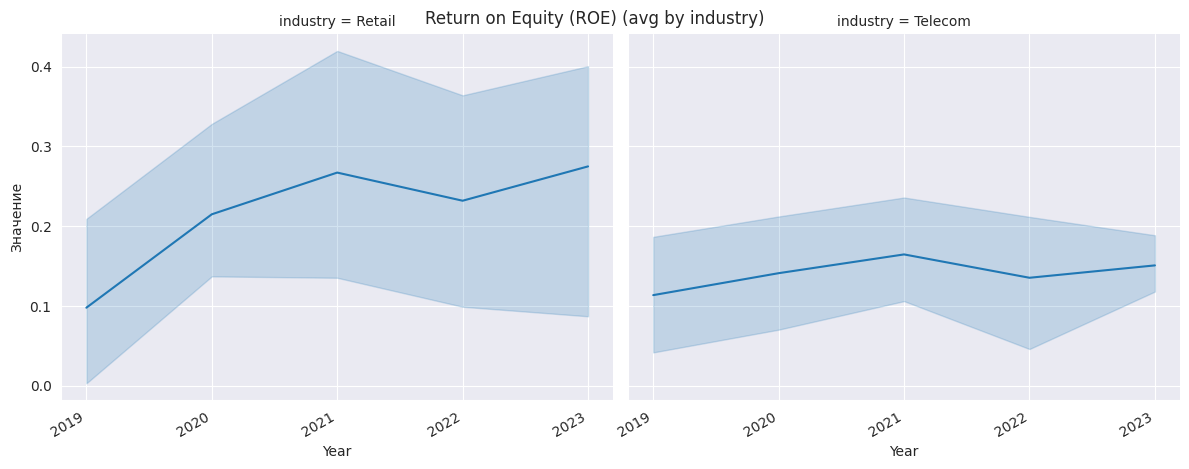

In [ ]:
g = sns.relplot(x="Year", y="Значение", col = "industry", data=df_roe, kind = "line",  height= 5, aspect= 1.2)
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Return on Equity (ROE) (avg by industry)')

Text(0.5, 0.98, 'Return on Equity (ROE)')

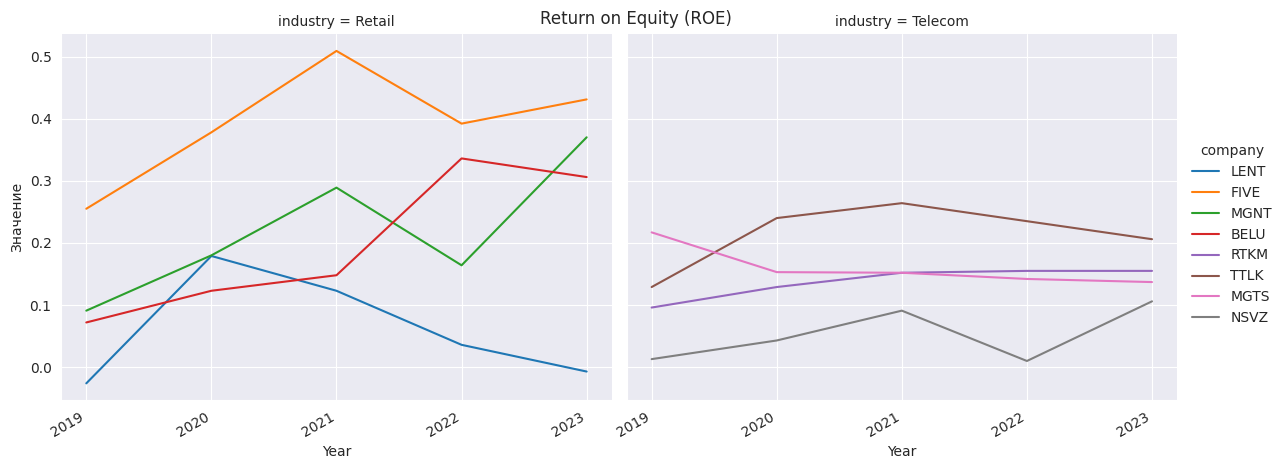

In [ ]:
g = sns.relplot(x="Year", y="Значение", hue = "company", col = "industry", data=df_roe, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Return on Equity (ROE)')

#from matplotlib.dates import DateFormatter
#formatter = DateFormatter('%Y')
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

В среднем компании сектора Retail имеют более высокие показатели ROE по сравнению с Telecom. Однако и разброс значений (вариативность) в Retai больше. Также в Retai есть тенденция к росту рентабельности с течением времени, тогда как в Telecom рентабельность остается примерно на одном уровне.

---
Далее выясним, за счет каких факторов обеспечивается высокий уровень ROE.

Для этого декомпозируем ROE по формуле Дюпона.

 # DuPont Analysis components
            profit_margin = net_income / revenue
            asset_turnover = revenue / total_assets
            equity_multiplier = total_assets / total_equity

            # DuPont Analysis Formula
            roe = profit_margin * asset_turnover * equity_multiplier

Text(0.5, 0.98, 'Profit margin (avg by industry)')

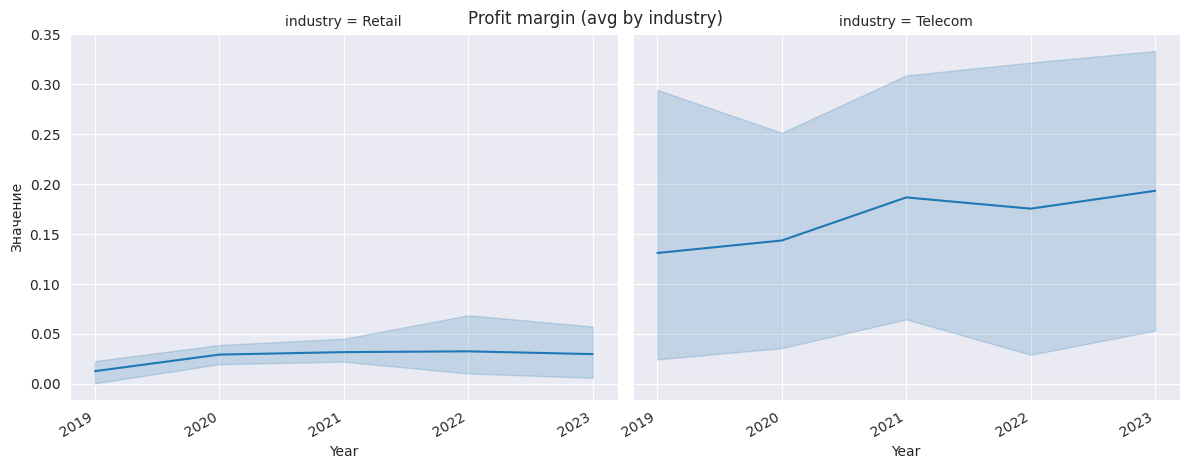

In [ ]:
# calculate profit_margin = net_income / revenue
df_profit_margin = df_filtered[(df_filtered.line_item == 'Чистая прибыль, млрд руб') | (df_filtered.line_item == 'Выручка, млрд руб')].pivot(index=['company','Year','industry'], columns='line_item', values='Значение').reset_index().assign(line_item2='чистая рентабельность')
df_profit_margin["Значение"] = df_profit_margin["Чистая прибыль, млрд руб"].div(df_profit_margin["Выручка, млрд руб"].values)

# Plotting the line chart
g = sns.relplot(x="Year", y="Значение", col = "industry", data=df_profit_margin, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Profit margin (avg by industry)')

Text(0.5, 0.98, 'Profit margin')

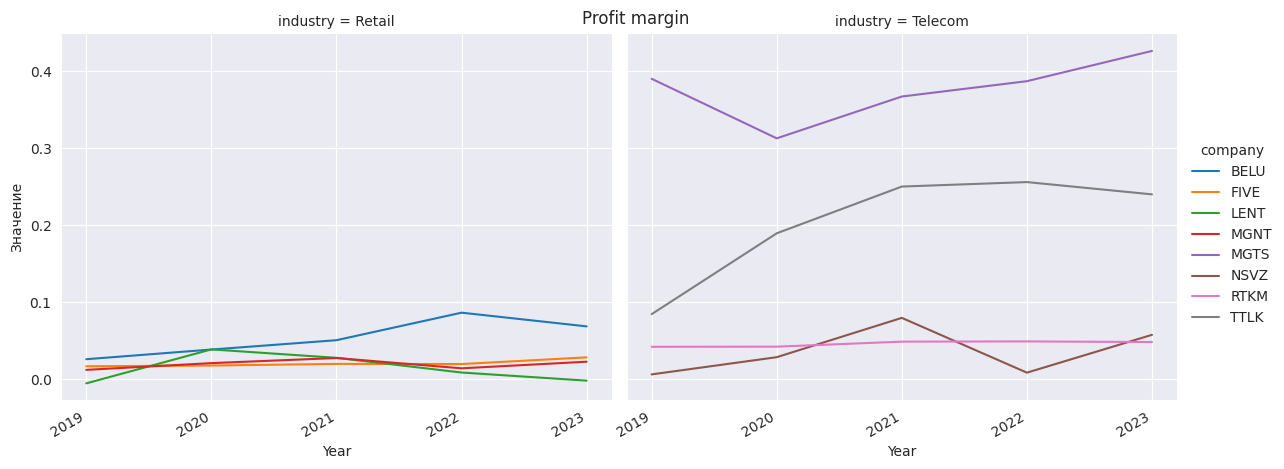

In [ ]:
g = sns.relplot(x="Year", y="Значение", hue = "company", col = "industry", data=df_profit_margin, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Profit margin')

Text(0.5, 0.98, 'Asset turnover (avg by industry)')

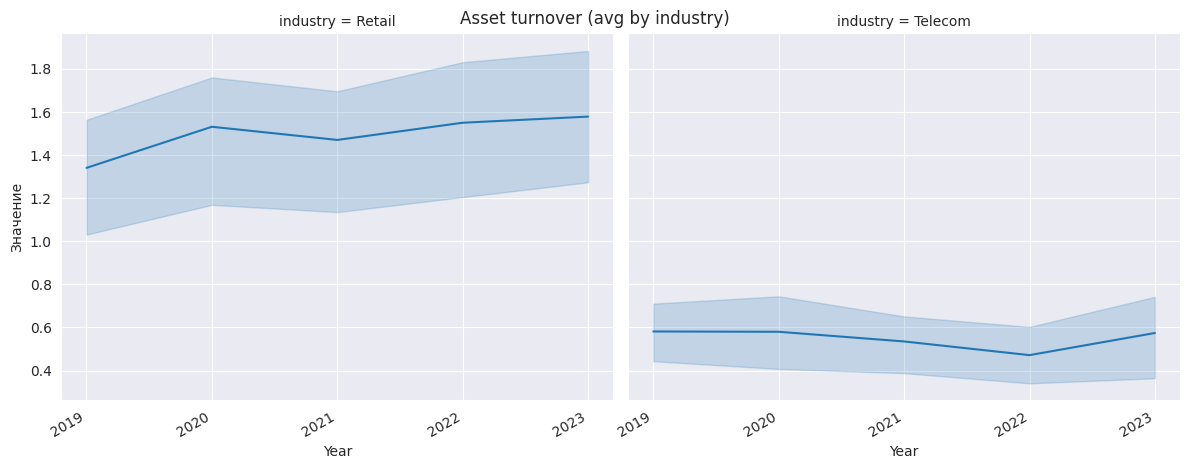

In [ ]:
# calculate asset_turnover = revenue / total_assets
df_asset_turnover = df_filtered[(df_filtered.line_item == 'Активы, млрд руб') | (df_filtered.line_item == 'Выручка, млрд руб')].pivot(index=['company','Year','industry'], columns='line_item', values='Значение').reset_index().assign(line_item2='оборачиваемость активов')
df_asset_turnover["Значение"] = df_asset_turnover["Выручка, млрд руб"].div(df_asset_turnover["Активы, млрд руб"].values)
# Plotting the line chart
g = sns.relplot(x="Year", y="Значение", col = "industry", data=df_asset_turnover, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Asset turnover (avg by industry)')

Text(0.5, 0.98, 'Asset turnover')

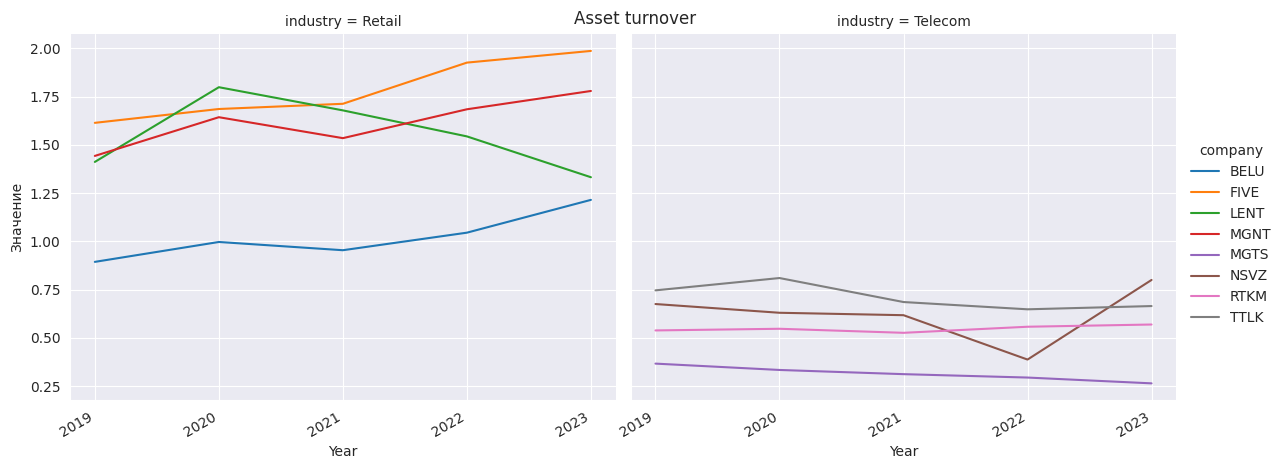

In [ ]:
g = sns.relplot(x="Year", y="Значение", hue = "company", col = "industry", data=df_asset_turnover, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Asset turnover')

Text(0.5, 0.98, 'Equity multiplier (avg by industry)')

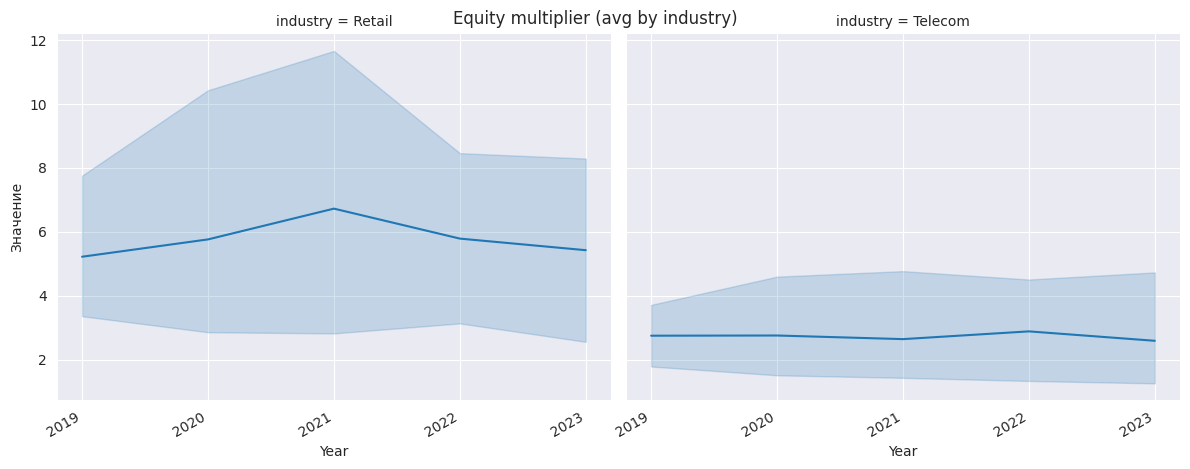

In [ ]:
# calculate equity_multiplier = total_assets / total_equity = roe / roa
#or  roe = net_income / total_equity ; roa =  net_income /  total_assets
#ROA, %

df_equity_multiplier = df_filtered[(df_filtered.line_item == 'ROA, %') | (df_filtered.line_item == 'ROE, %')].pivot(index=['company','Year','industry'], columns='line_item', values='Значение').reset_index().assign(line_item2='финансовый рычаг')
df_equity_multiplier["Значение"] = df_equity_multiplier["ROE, %"].div(df_equity_multiplier["ROA, %"].values)
#df_equity_multiplier = df_equity_multiplier.sort_values(by='value', ascending=False)

# Plotting the line chart
g = sns.relplot(x="Year", y="Значение", col = "industry", data=df_equity_multiplier, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Equity multiplier (avg by industry)')

Text(0.5, 0.98, 'Equity multiplier')

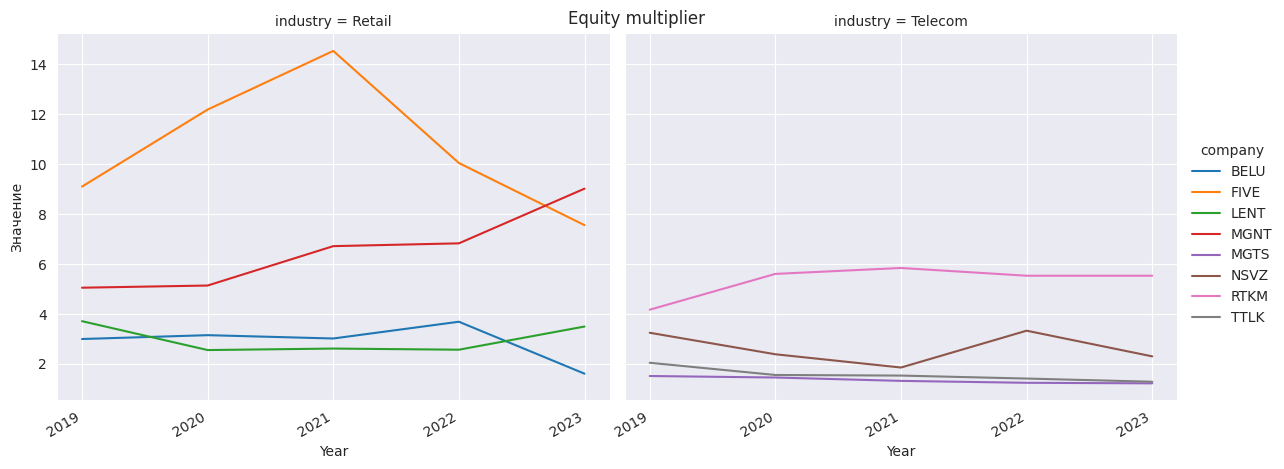

In [ ]:
g = sns.relplot(x="Year", y="Значение", hue = "company", col = "industry", data=df_equity_multiplier, kind = "line",  height= 5, aspect= 1.2 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Equity multiplier')

In [ ]:
# Concatenating Dataframes
df_concat = pd.concat([df_profit_margin[['company','Year', 'Значение', 'industry', 'line_item2']], df_asset_turnover[['company','Year', 'Значение', 'industry', 'line_item2']], df_equity_multiplier[['company','Year', 'Значение', 'industry', 'line_item2']], df_roe[['company','Year', 'Значение', 'industry', 'line_item2']]], axis=0, ignore_index=True)
df_concat.head()

,company,Year,Значение,industry,line_item2
0,BELU,2019,0.026316,Retail,чистая рентабельность
1,BELU,2020,0.038863,Retail,чистая рентабельность
2,BELU,2021,0.051001,Retail,чистая рентабельность
3,BELU,2022,0.086742,Retail,чистая рентабельность
4,BELU,2023,0.068948,Retail,чистая рентабельность


Text(0.5, 1.05, 'Декомпозиция ROE Retail')

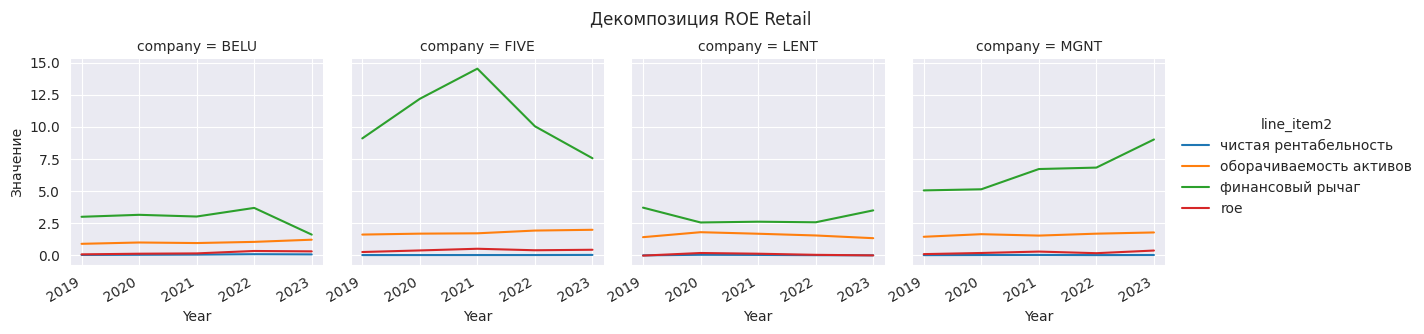

In [ ]:
g = sns.relplot(x="Year", y="Значение", hue = "line_item2", col = "company", data=df_concat[df_concat.industry == 'Retail'], kind = "line",  height= 3, aspect= 1 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Декомпозиция ROE Retail', y=1.05)

Text(0.5, 1.05, 'Декомпозиция ROE Telecom')

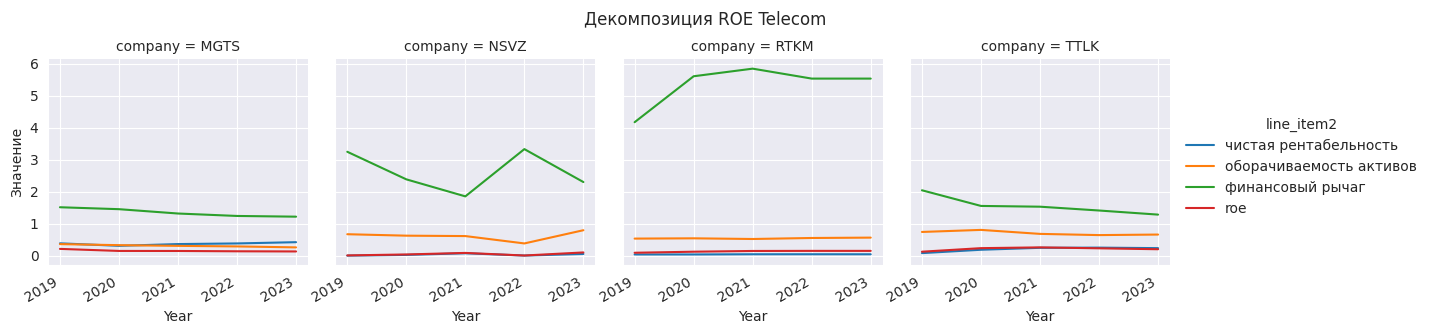

In [ ]:
g = sns.relplot(x="Year", y="Значение", hue = "line_item2", col = "company", data=df_concat[df_concat.industry == 'Telecom'], kind = "line",  height= 3, aspect= 1 )
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Декомпозиция ROE Telecom', y=1.05)



---


# t-тест для среднего ROE по отраслям

Попробуем узнать, как отличается средний показатель ROE по отрасли (ретейл и телеком). Есть ли между ними значимые различия?

Для этого мы проведём t-тест. Наша нулевая гипотеза: между средними оценками ROE по отраслям нет значимого отличия.

Перед проведением двухвыборочного t-теста нам нужно выяснить, имеют ли заданные группы данных одинаковую дисперсию.

In [ ]:
import scipy.stats as stats
df_roe_retail = df_roe[(df_roe.industry == 'Retail')]["Значение"]
df_roe_telecom = df_roe[(df_roe.industry == 'Telecom')]["Значение"]
print(np.var(df_roe_retail), np.var(df_roe_telecom))
print(np.var(df_roe_retail)/np.var(df_roe_telecom))

0.022333147499999997 0.004687387499999999
4.764519148459564


Если отношение группы данных с большей дисперсией к группе данных с меньшей дисперсией меньше 4:1, то можно считать, что заданные группы данных имеют одинаковую дисперсию.
В нашем случае соотношение 0.03468258240000001 : 0.004154694400000001 = 8 : 1, значит дисперсию групп нельзя считать одинаковой (больше чем 4: 1).

In [ ]:
stat, p = stats.ttest_ind(a=df_roe_retail, b=df_roe_telecom, equal_var=False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 2.02062, p = 0.05348
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Поскольку в нашем случае p-значение больше 0,05  (уровня значимости), мы можем принять нулевую гипотезу теста и сделать вывод, что между средними оценками ROE по отраслям нет значимого отличия.

# Прогнозирование ROE по сектору Retail

Text(0.5, 0.98, 'Historical Return on Equity (ROE) Data')

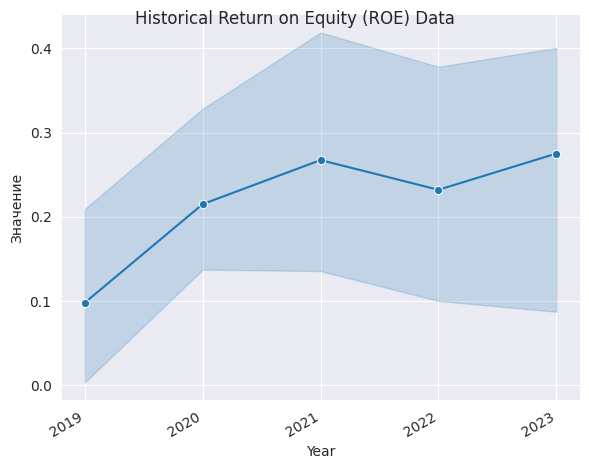

In [ ]:
data = df_roe[df_roe.industry == 'Retail'][['Year', 'Значение']]. copy ()

data.set_index('Year', inplace=True)

g = sns.relplot(x="Year", y="Значение", data=data, kind = "line",  height= 5, aspect= 1.2, marker='o')
sns.set_style("darkgrid")
g.fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
g.fig.suptitle('Historical Return on Equity (ROE) Data')

Для определения параметров модели определим функцию search_optimal_sarima.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings
warnings.filterwarnings("ignore")

def search_optimal_arima(time_series):
  p = range(0,10)
  d = q = range(0,3)
  pdq = list(itertools.product(p, d, q))
  best_pdq = (0,0,0)
  best_aic = np.inf
  for params in pdq:
    model_test = ARIMA(time_series, order = params)
    result_test = model_test.fit()
    if result_test.aic < best_aic:
      best_pdq = params
      best_aic = result_test.aic
  print('ARIMA{} - AIC:{}'.format(best_pdq, best_aic))
search_optimal_arima(data['Значение'])

ARIMA(1, 0, 0) - AIC:-16.673988774965686


Подставляем найденные значения параметров в нашу модель

In [ ]:
# Fit ARIMA model to the data
model = ARIMA(data['Значение'], order=(1,0,0))
results = model.fit()

In [ ]:
# Forecast next year's ROE
forecast = results.forecast(steps=2)

In [ ]:
next_year_profit = forecast

print("Forecasted ROE for next two years:\n", round(next_year_profit, 2))

Forecasted ROE for next two years:
 20    0.25
21    0.23
Name: predicted_mean, dtype: float64


В последующее 2 года прогнозируется падение среднего уровня ROE для компаний сектора Retail